<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/03_Implementation_Perspective_of_Handling_Linearly_Separable_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 Implementation: Perspective of Handling Linearly Separable Data

## Step 1: Choose a Linearly Separable Dataset


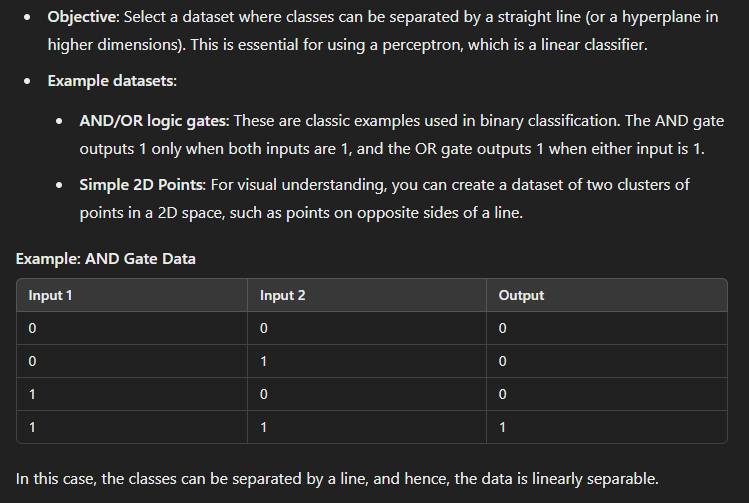

In [1]:
import numpy as np

# Step 1: Define the dataset (AND gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate output

## Step 2: Define the Perceptron as a Linear Classifier


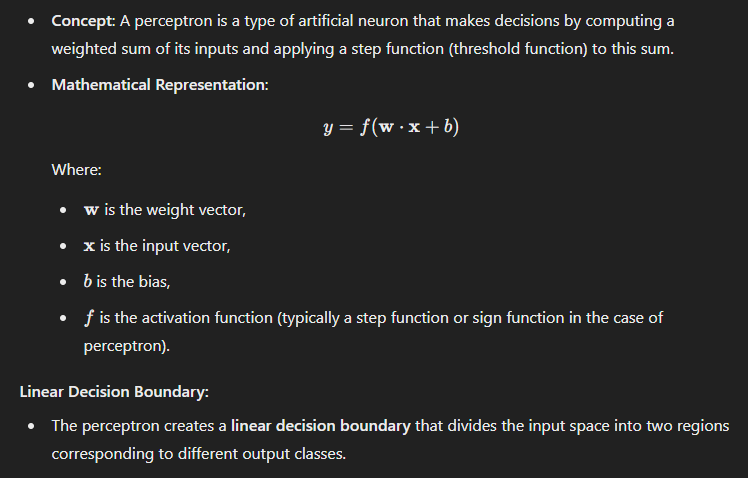

In [2]:

# Step 2: Initialize weights and bias
weights = np.random.rand(2)  # Two inputs, so two weights
bias = np.random.rand(1)
learning_rate = 0.1

# Activation function
def step_function(x):
    return 1 if x >= 0 else 0


## Step 3: Train the Model on the Dataset


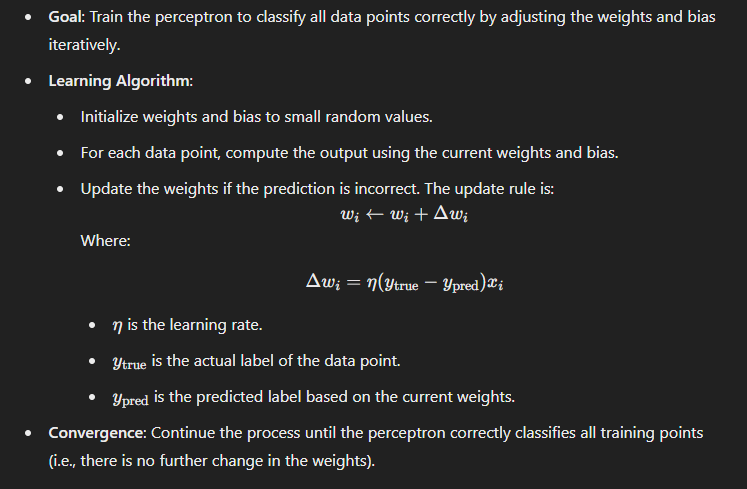

In [3]:
# Step 3: Training the perceptron
def train_perceptron(X, y, weights, bias, epochs=10):
    for epoch in range(epochs):
        for i in range(len(X)):
            # Calculate the perceptron output
            linear_output = np.dot(X[i], weights) + bias
            y_pred = step_function(linear_output)

            # Update weights and bias if the prediction is wrong
            error = y[i] - y_pred
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    return weights, bias

# Train the perceptron
weights, bias = train_perceptron(X, y, weights, bias)

## Step 4: Analyze the Decision Boundary


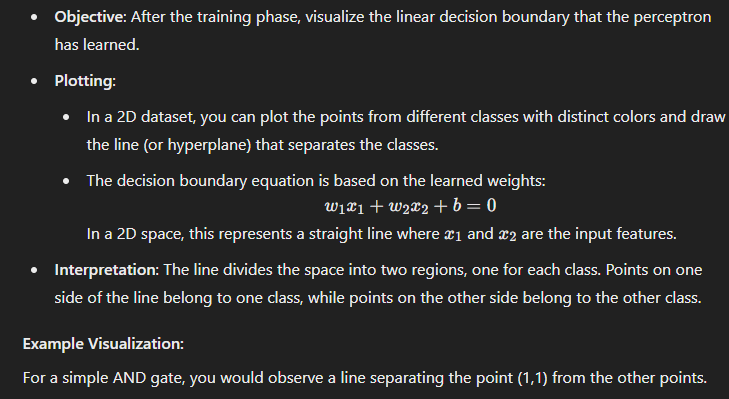

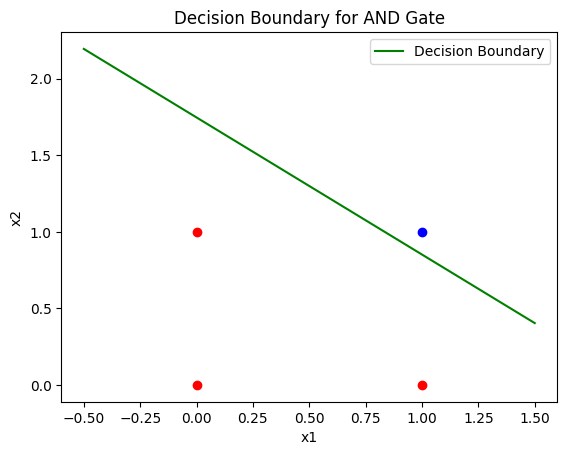

In [10]:

# Step 4: Plot decision boundary (optional using matplotlib)
import matplotlib.pyplot as plt

# Plot points
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red')
    else:
        plt.scatter(X[i][0], X[i][1], color='blue')



## Plot decision boundary (w1 * x1 + w2 * x2 + b = 0)

# Generate an array of 100 linearly spaced values between -0.5 and 1.5.
# This array represents possible values of the first input (x1) to the perceptron,
# over which we want to visualize the decision boundary in a 2D plot.
x1 = np.linspace(-0.5, 1.5, 100)

# Calculate corresponding values of the second input (x2) using the perceptron's decision boundary formula.
# The decision boundary formula w1*x1 + w2*x2 + b = 0 is rearranged to solve for x2:
# x2 = -(w1*x1 + b) / w2
# This gives the set of (x1, x2) pairs that lie exactly on the decision boundary where the perceptron switches
# from one decision class to another (from predicting 0 to predicting 1 or vice versa).
x2 = -(weights[0] * x1 + bias) / weights[1]

# Plot the decision boundary line in a 2D plot using a green line.
plt.plot(x1, x2, '-g', label='Decision Boundary')

# Label the x-axis as 'x1'.
plt.xlabel('x1')

# Label the y-axis as 'x2'.
plt.ylabel('x2')

# Set the title of the plot to indicate what is being visualized.
plt.title('Decision Boundary for AND Gate')

# Display the legend to indicate what the green line represents.
plt.legend()

# Display the plot.
plt.show()

#### Note: Explanation for Dicision boundary equation

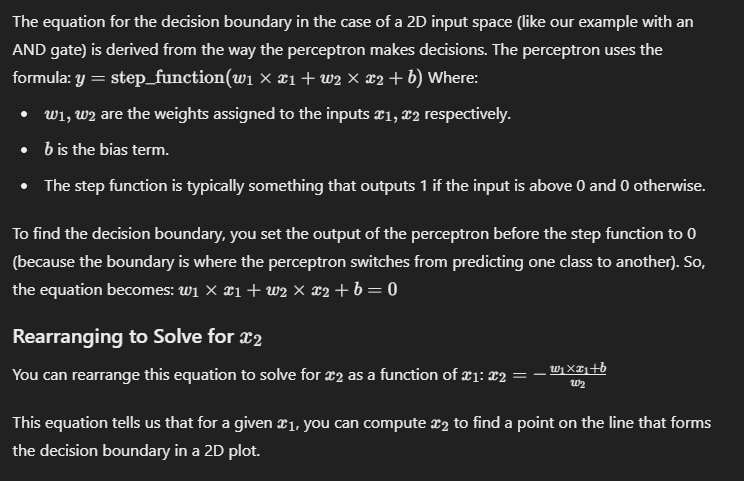

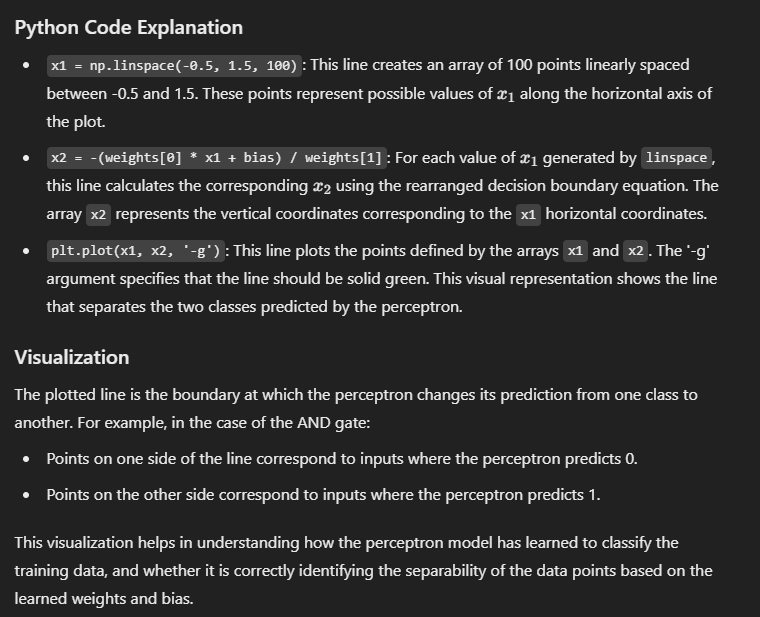

## Step 5: Test the Model on New Linearly Separable Data


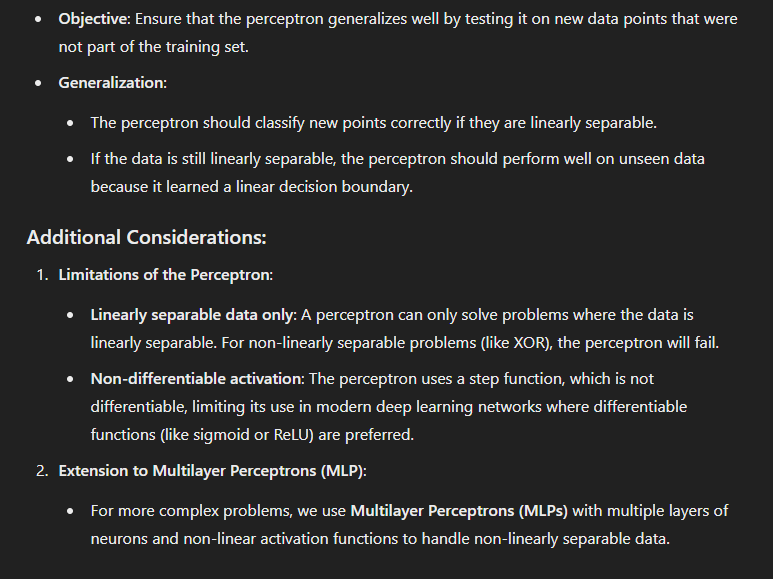

Accuracy on test data: 1.00


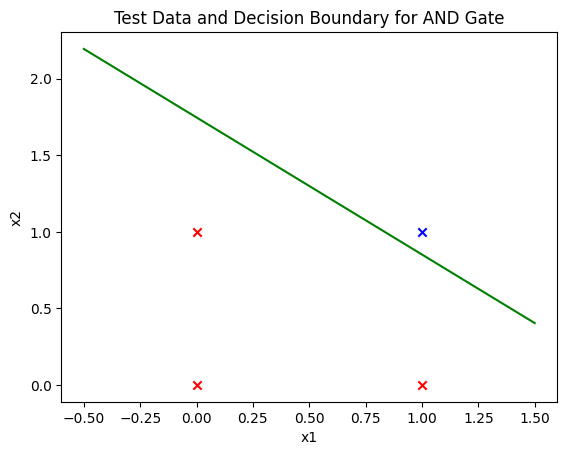

In [12]:

# Test function
def test_perceptron(X_test, y_test, weights, bias):
    y_preds = []
    for x in X_test:
        output = step_function(np.dot(x, weights) + bias)
        y_preds.append(output)
    return y_preds

# Generate new test data (still linearly separable)
X_test = np.array([[0, 1], [1, 1], [1, 0], [0, 0]])
y_test = np.array([0, 1, 0, 0])  # Expected outputs for AND logic on new inputs

# Test the model
y_preds = test_perceptron(X_test, y_test, weights, bias)

# Evaluate model performance
correct_predictions = np.sum(y_preds == y_test)
accuracy = correct_predictions / len(y_test)
print(f"Accuracy on test data: {accuracy:.2f}")

# Plot decision boundary and test points
for i in range(len(X_test)):
    if y_preds[i] == 0:
        plt.scatter(X_test[i][0], X_test[i][1], color='red', marker='x')
    else:
        plt.scatter(X_test[i][0], X_test[i][1], color='blue', marker='x')

# Plot decision boundary (w1 * x1 + w2 * x2 + b = 0)
x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(weights[0] * x1 + bias) / weights[1]
plt.plot(x1, x2, '-g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test Data and Decision Boundary for AND Gate')
plt.show()